## VGG16 architecture


*   filter_size = 3X3
*   stride = 1
*   padding = 1 ('=same')
*   max_pooling = 2X2 with stride 2



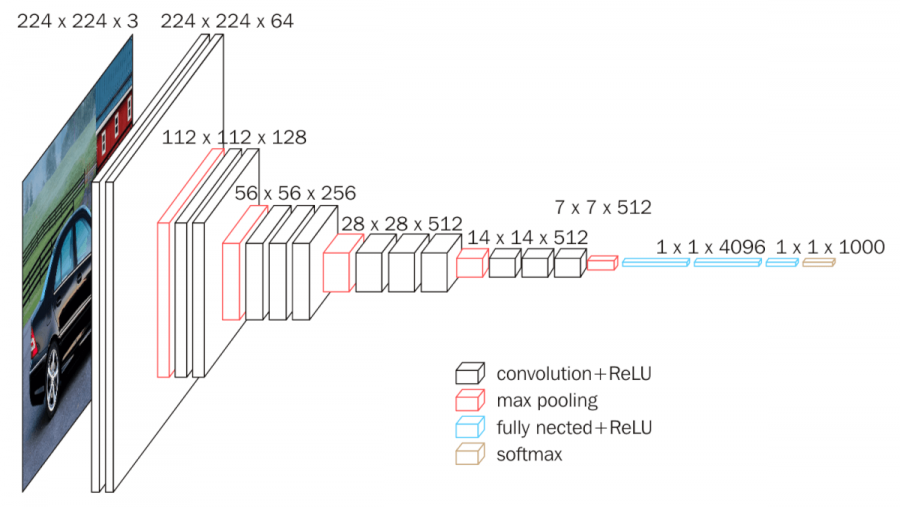

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

In [ ]:
# device setting
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # cuda -> GPU
device


device(type='cpu')

In [ ]:
class VGG(nn.Module): # nn.Module = 상속자
  def __init__(self): # 설계도에서 사용할 재료
    super(VGG, self).__init__() # 관습
    self.conv1 = nn.Conv2d(in_channels= 3, out_channels= 64, kernel_size= 3, padding = 'same')
    self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding ='same')
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding ='same')
    self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding ='same')
    self.conv5 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding ='same')
    self.conv6 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding ='same')
    self.conv7 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding ='same')
    self.conv8 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, padding ='same')
    self.conv9 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding ='same')
    self.conv10 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding ='same')
    # self.conv11 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding ='same')
    # self.conv12 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding ='same')
    # self.conv13 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding ='same')
    # self.conv14 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding ='same')
    self.pool = nn.MaxPool2d(2, 2) # 한 번만 해줘도 됨

    self.fc1 = nn.Linear(512*7*7, 4096)
    self.fc2 = nn.Linear(4096, 4096)
    self.fc3= nn.Linear(4096, 1000)

  def forward(self, x): # 실제로 제품을 제조하고 출력을 생성하는 생산라인의 역할
    x = self.pool(F.relu(self.conv2(F.relu(self.conv1(x)))))
    x = self.pool(F.relu(self.conv4(F.relu(self.conv3(x)))))
    x = self.pool(F.relu(self.conv6(F.relu(self.conv5(x)))))
    x = self.pool(F.relu(self.conv8(F.relu(self.conv7(x)))))
    x = self.pool(F.relu(self.conv10(F.relu(self.conv9(x)))))
    # x = self.pool(F.relu(self.conv12(F.relu(self.conv11(x)))))
    # x = self.pool(F.relu(self.conv14(F.relu(self.conv13(x)))))

    x = x.view(-1, 512*7*7) # -1 -> batch (자동으로 크기 조정)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
model = VGG().to(device)
model

VGG(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=sa

In [ ]:
x = torch.randn(1, 3, 224, 224).to(device)
print(model(x).shape)

RuntimeError: ignored

## VGG19

In [ ]:
VGG19 = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 'M'] # architecture -> 은 maxplooing
# 원하는 리스트를 만들어 줌 레이어의 개수와 모델의 모양을 조절함

In [ ]:
class VGG(nn.Module):
  def __init__(self, in_channels=3, num_classes = 1000, VGG_type = VGG16): # 값 설정 (in_channels = 3, num_classes = 1000)
    super(VGG, self).__init__()
    self.in_channels = in_channels
    self.VGG_type = VGG_type

    self.conv_layers = self.create_conv_layers(self.VGG_type)

    self.fcs = nn.Sequential(nn.Linear(512*7*7, 4096),  # 4096은 의미 없음
                             nn.ReLU(),
                             nn.Linear(4096, 4096),
                             nn.ReLU(),
                             nn.Linear(4096, num_classes))


  def create_conv_layers(self, architecture): # class 함수 -> init와 forward 뿐만 아니라  만들 수 있음
    layers = []
    in_channles = self.in_channels

    for x in architecture:
      if type(x) == int:
        out_channels = x

        layers += [nn.Conv2d(in_channles, out_channels, 3, padding='same'),
                   nn.ReLU()]

        in_channles = out_channels #
      elif x == 'M':
        layers += [nn.MaxPool2d(2,2)]

    return nn.Sequential(*layers) # * -> lanyers는 변할 수있어서 즉 변할수 있는 파라미터를 정의할때는 *를 붙임 -> **의 의미는 kargs -> keyword argument는 파라미터

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.view(-1, 512*7*7) # x.view(x.)
    x = self.fcs(x)
    return x


In [ ]:
model = VGG().to(device) # VGG타입을 바꾸고 싶을때는 model = VGG(VGG_type = VGG19).to(device)
model

VGG(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (15): ReLU()
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (17): ReLU()
    (18): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, 

In [ ]:
x = torch.randn(1,3,224,224).to(device)
print(model(x).shape)

torch.Size([1, 1000])
